In [2]:
import json

with open("iterations_report.json", "r") as file:
    iterations_report = json.load(file)

iterations_report = dict(iterations_report)

λ:  32689496.92521747


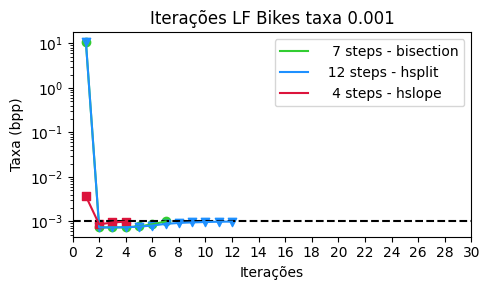

λ:  439329.76424873515


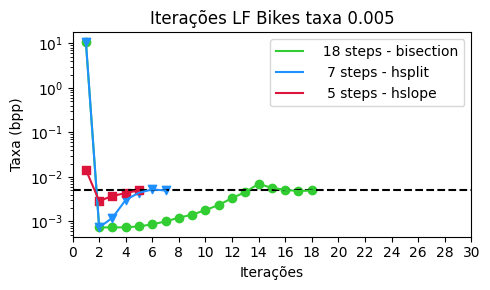

λ:  39521.42550771987


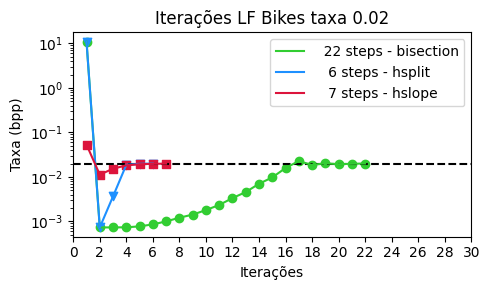

λ:  3971.1991739327427


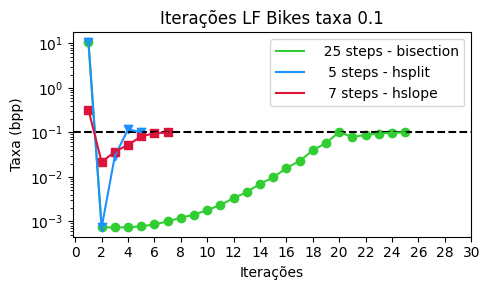

λ:  263.6042001463843


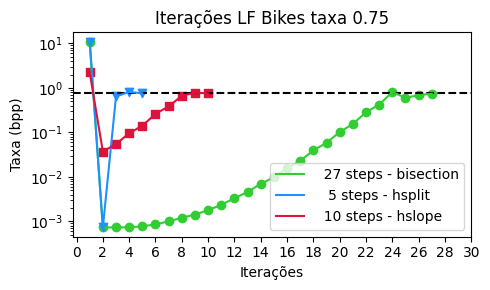

λ:  44461866.42923296


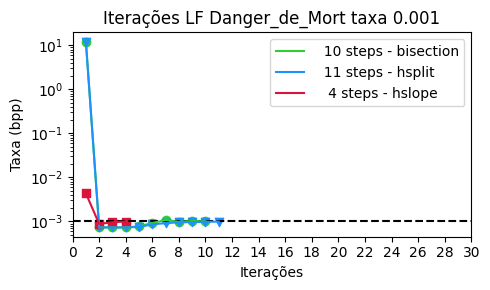

λ:  605716.7156280357


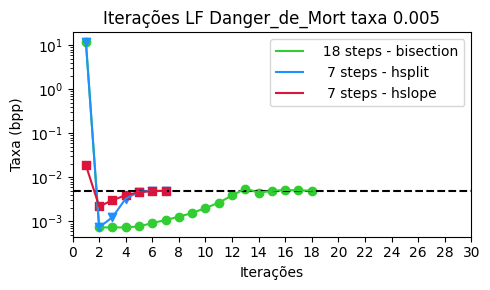

λ:  65546.78415356815


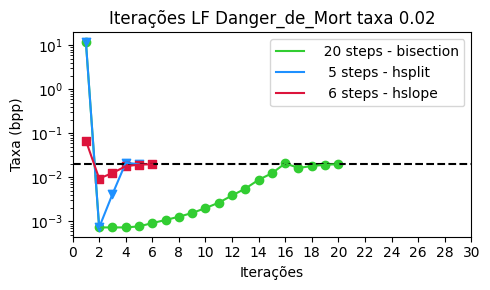

λ:  5864.805109512005


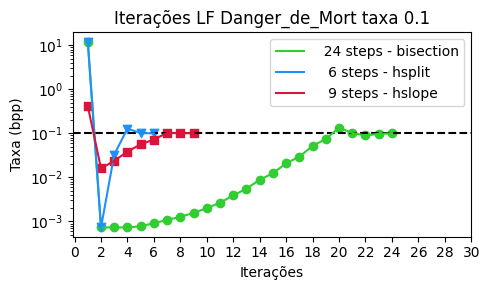

λ:  364.9859843915368


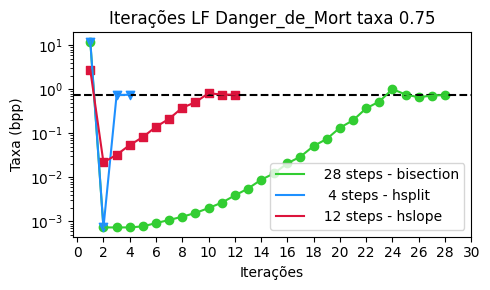

λ:  45695293.85262591


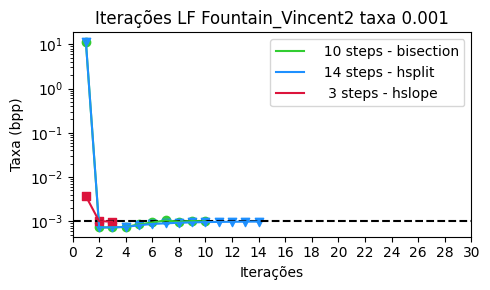

λ:  450319.3065958954


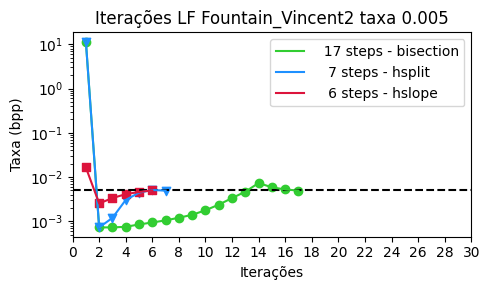

λ:  53230.008464852974


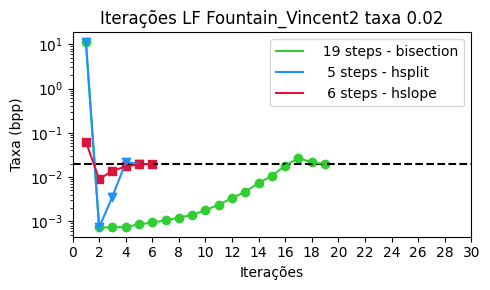

λ:  5161.171839688034


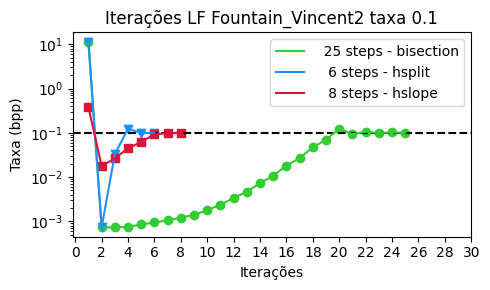

λ:  321.70920118040135


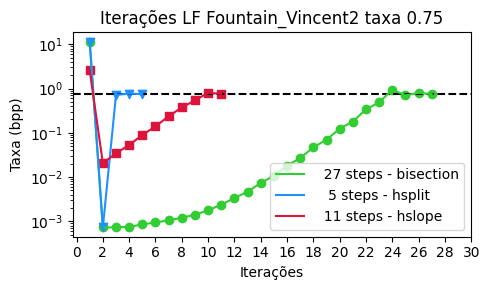

λ:  36586960.3382439


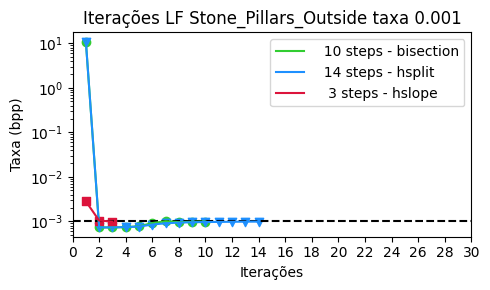

λ:  233405.57128352273


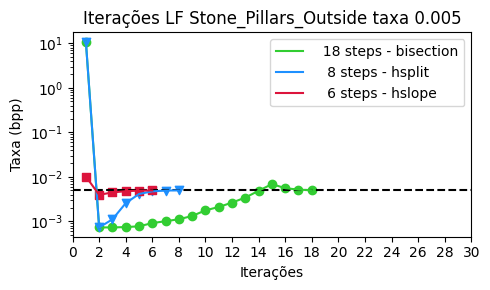

λ:  27401.53779609824


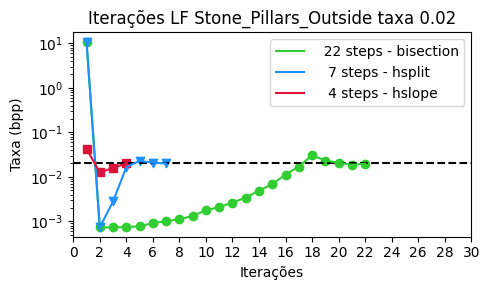

λ:  3092.264398722445


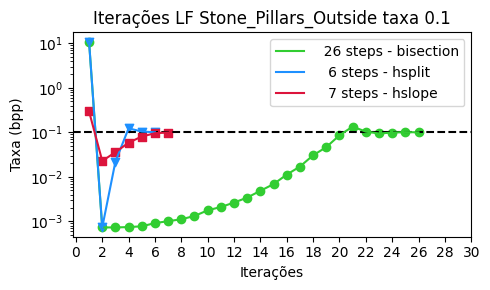

λ:  242.0988027257158


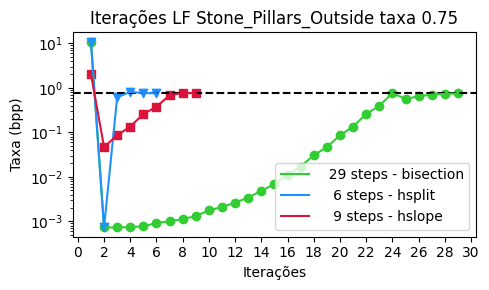

λ:  11967771.798912583


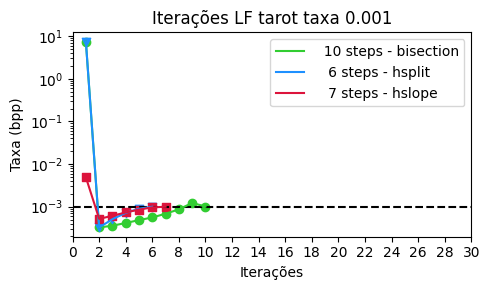

λ:  774749.952597687


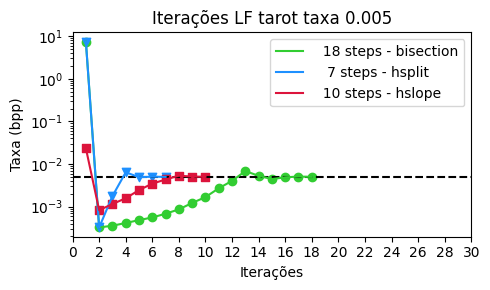

λ:  96624.07651420373


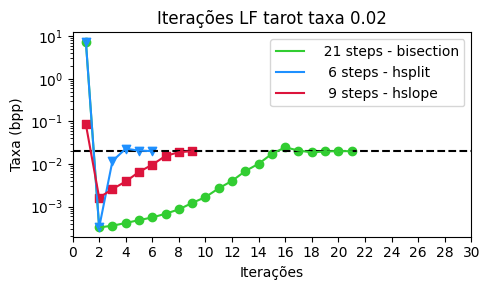

λ:  6411.048486659654


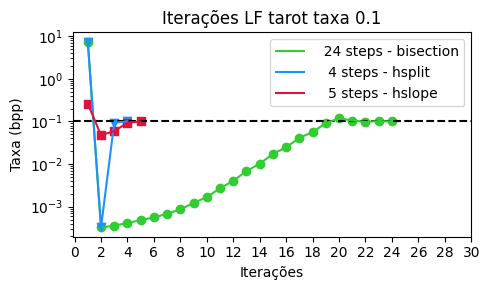

λ:  157.2160410388461


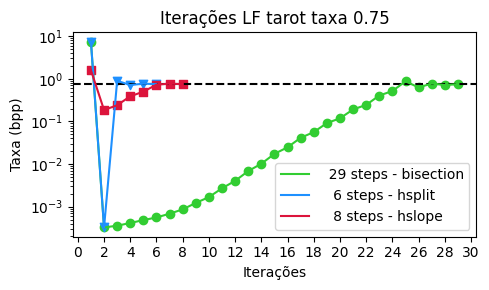

λ:  348441.2224912887


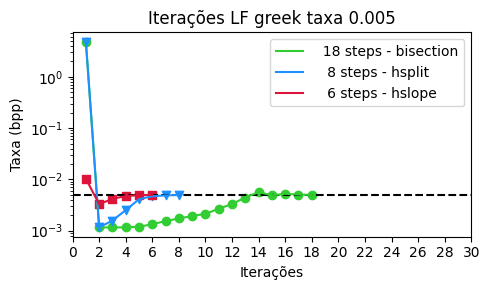

λ:  21271.772529200472


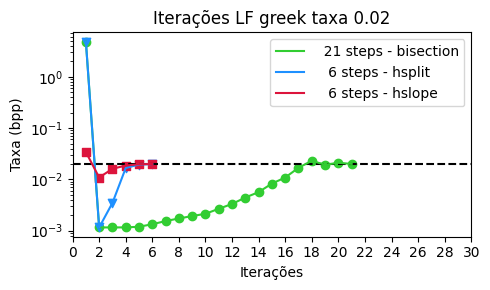

λ:  1321.1646580914166


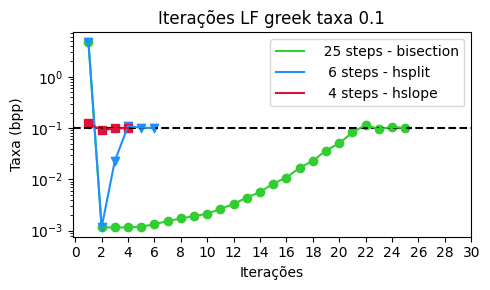

λ:  42.561294578697854


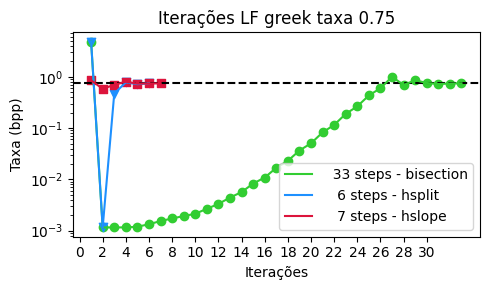

λ:  1203026.3585571426


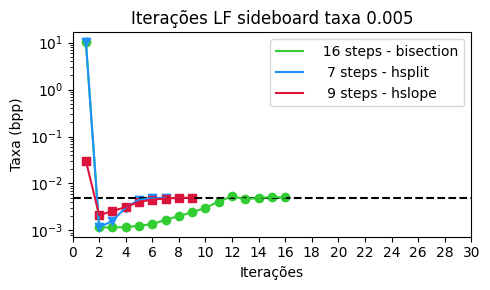

λ:  138639.33757714674


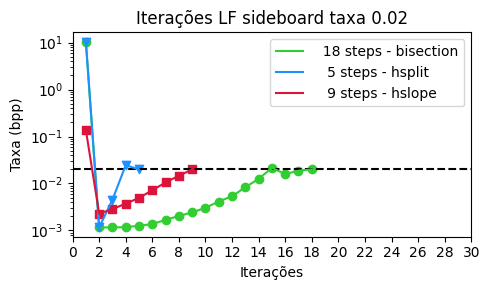

λ:  11574.82545125597


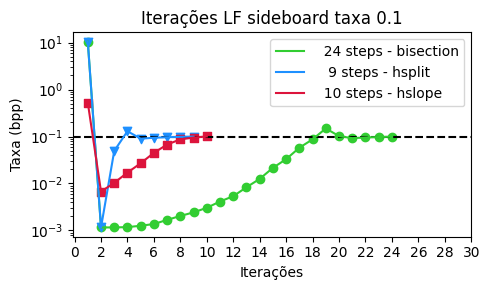

λ:  546.7012547117072


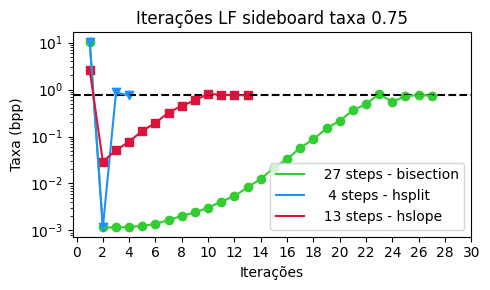

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def plot_iterations_report(light_fields: list[str], target_rates: list[float]):
    algorithm_style = {
        "bisection": ("limegreen", "o"),
        "hsplit":    ("dodgerblue",   "v"), 
        "hslope":    ("crimson",    "s"),
    }

    for lf_name in light_fields:
        for tr in sorted(target_rates):
            plt.figure(figsize=[5, 3])
            plt.title(f"Iterações LF {lf_name} taxa {tr}")
            plt.xlabel("Iterações")
            plt.ylabel("Taxa (bpp)")
            plt.yscale("log")

            for al, (color, marker) in algorithm_style.items():
                data = iterations_report[lf_name][str(tr)][al]

                try:
                    bpp = [i["bpp"] for i in data]
                    lambida = [i["lf_lambda"] for i in data][-1]
                    iterations = range(1, 1 + len(bpp))
                except Exception as e:
                    print(e)
                    print(lf_name, tr, al)

                label = f"{len(bpp):>4} steps - {al}"
                plt.plot(iterations, bpp, color=color, label=label)
                plt.scatter(iterations, bpp, color=color, marker=marker)

            print("λ: ", lambida)
            plt.axhline(tr, color="black", linestyle="dashed", zorder=1)
            plt.xticks(range(0, 32, 2))
     
            plt.legend()
            plt.tight_layout()
            plt.savefig(f"iterations_report/{lf_name.lower()}_{str(tr)}.png", dpi=300)
            plt.savefig(f"iterations_report/{lf_name.lower()}_{str(tr)}.pdf")
            plt.show()

plot_iterations_report(
    light_fields = [
        # lenslet
        "Bikes",
        "Danger_de_Mort",
        "Fountain_Vincent2",
        "Stone_Pillars_Outside",

        #
        "tarot", 
    ],
    
    target_rates = [
        0.001,
        0.005,
        0.02,
        0.1,
        0.75
    ]
)

plot_iterations_report(
    light_fields = [
        # Synthetic
        "greek",
        "sideboard",
    ],
    
    target_rates = [
        0.005,
        0.02,
        0.1,
        0.75
    ]
)


No iteration data found for "greek" for rate 0.001 using the algorithm "bisection".
No iteration data found for "sideboard" for rate 0.001 using the algorithm "bisection".
No iteration data found for "greek" for rate 0.001 using the algorithm "hsplit".
No iteration data found for "sideboard" for rate 0.001 using the algorithm "hsplit".
No iteration data found for "greek" for rate 0.001 using the algorithm "hslope".
No iteration data found for "sideboard" for rate 0.001 using the algorithm "hslope".


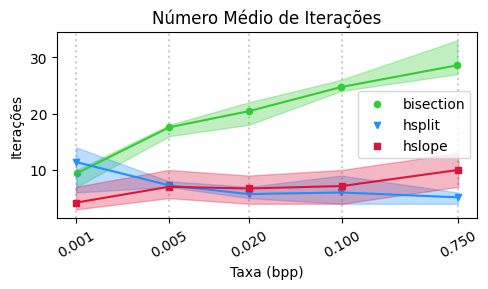

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from matplotlib.ticker import ScalarFormatter
from matplotlib.axes import Axes


def plot_average_iterations_report(light_fields: list[str], target_rates: list[float]):
    algorithm_style = {
        "bisection": ("limegreen", "o"),
        "hsplit":    ("dodgerblue",   "v"), 
        "hslope":    ("crimson",    "s"),
    }

    fig, ax = plt.subplots(figsize=[5,3])
    ax: Axes

    ax.set_title('Número Médio de Iterações')
    ax.set_xscale("log")
    ax.set_xlabel("Taxa (bpp)")
    ax.set_ylabel("Iterações")
    ax.get_xaxis().set_major_formatter(ScalarFormatter())
    ax.get_xaxis().set_tick_params(which='minor', size=0)
    ax.get_xaxis().set_tick_params(which='minor', width=0) 

    for rate in target_rates:
        ax.axvline(rate, linestyle=":", color="0.8", zorder=0)

    for algo, (color, marker) in algorithm_style.items():
        computed_rates = []
        iterations = []
        min_iterations = []
        max_iterations = []

        for rate in target_rates:
            current_iterations = []
            found_rate = None
            for lf_name in light_fields:
                try:
                    data = iterations_report[lf_name][str(rate)][algo]
                    found_rate = data[-1]["bpp"]
                    current_iterations.append(len(data))
                except KeyError:
                    print(f'No iteration data found for "{lf_name}" for rate {rate} using the algorithm "{algo}".')
                    continue

            if found_rate is None:
                continue

            computed_rates.append(found_rate)
            iterations.append(np.average(current_iterations))
            min_iterations.append(np.min(current_iterations))
            max_iterations.append(np.max(current_iterations))

        ax.plot(computed_rates, iterations, color=color)
        ax.fill_between(computed_rates, min_iterations, max_iterations, color=to_rgba(color, 0.3))
        ax.scatter(computed_rates, iterations, color=color, marker=marker, s=20, label=algo)
        ax.set_xticks(target_rates)
        ax.tick_params(axis='x', labelrotation=30)

    ax.legend()
    plt.tight_layout()
    plt.savefig(f"iterations_report/averages.png", dpi=300)
    plt.savefig(f"iterations_report/averages.pdf")
    plt.show()

plot_average_iterations_report(
    light_fields = [
        # lenslet
        "Bikes",
        "Danger_de_Mort",
        "Fountain_Vincent2",
        "Stone_Pillars_Outside",

        #
        "tarot",

        "greek",
        "sideboard",
    ],
    
    target_rates = [
        0.001,
        0.005,
        0.02,
        0.1,
        0.75
    ]
)

# plot_average_iterations_report(
#     light_fields = [
#         # Synthetic
#         "greek",
#         "sideboard",
#     ],
    
#     target_rates = [
#         0.005,
#         0.02,
#         0.1,
#         0.75
#     ]
# )
